In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import csv
import re
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
# Extract video data with country + is_stem
df_video_with_stem = pd.read_csv('/content/drive/MyDrive/edu-data/video_with_country_and_stem.csv')

In [17]:
# Sample 100 STEM videos
stem_videos = df_video_with_stem[df_video_with_stem['is_stem'] == True].sample(n=100)

# Print titles and tags
for index, row in stem_videos.iterrows():
  print(f"Title: {row['title']}")
  print(f"Tags: {row['tags']}")
  print("-" * 20)

Title: GCSE Science Biology (9-1) Measles and HIV
Tags: gcse,science,biology,revision,measles,hiv
--------------------
Title: பழுதான LIFT ல் சிக்கிக்கொண்டால் என்ன செய்யனும் தெரியுமா
Tags: Elevator Stuck,Lift Stuck,Elevator Escape,Lift Breakdown,Elevator Rescue
--------------------
Title: Systemic factors and wound healing
Tags: healing,systemic factors
--------------------
Title: Slutsky versus Hicks! Income & Substitution, Equivalent Variation, Paasche, and more!
Tags: Income Effect,Slutsly Equation,Substitution Effect,Price Indexes
--------------------
Title: Peter at DARPA
Tags: Computer,Science,Education
--------------------
Title: Current To Voltage Converter(हिन्दी )
Tags: OP AMP
--------------------
Title: Hints About
Tags: educational
--------------------
Title: 1.6.2 Sets Operations: Video
Tags: sets,operations,venn diagram,union,intersection,set theory,equality,difference,complement
--------------------
Title: La recette des apprentis polyglottes - Cécile Plecenik | PG 2018
T

In [18]:
data = []

# Extract titles and tags and append to the data list
for index, row in stem_videos.iterrows():
  data.append([row['title'], row['tags']])

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=['Title', 'Tags'])

# Export to Excel
df.to_excel('/content/drive/MyDrive/edu-data/stem_video_titles_tags.xlsx', index=False)

Repeat the same analysis in M2:

Top 10 Countries - Comparison of Total Videos and STEM Videos:
         Total Videos (%)  STEM Videos (%)
country                                   
US              46.734719        62.288382
IN              21.908318        16.429138
GB               7.246876         5.713027
CA               3.409904         2.927860
ES               1.864351         2.258434
AU               1.777473         1.682375
ZA               0.649311         1.486832
BR               0.260268         0.653572
IL               0.740269         0.558443
MX               0.276901         0.539065


<Figure size 1200x600 with 0 Axes>

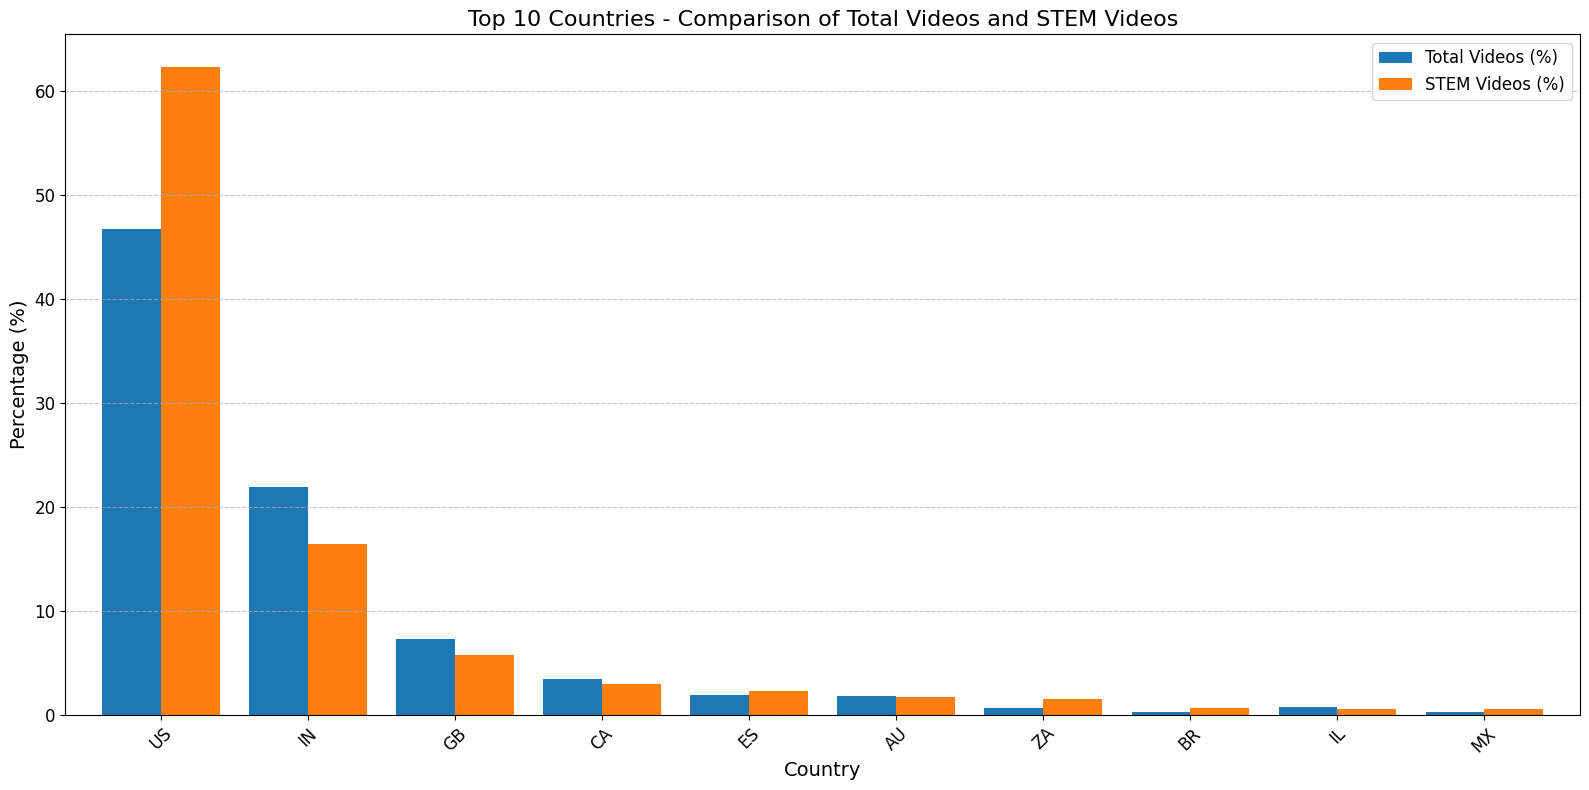

India's Total Video Percentage: 21.91%
India's STEM Video Percentage: 16.43%


In [8]:
total_videos_per_country = df_video_with_stem['country'].value_counts(normalize=True) * 100

stem_videos = df_video_with_stem[df_video_with_stem['is_stem'] == True]
stem_videos_per_country = stem_videos['country'].value_counts(normalize=True) * 100

comparison_df = pd.DataFrame({
    'Total Videos (%)': total_videos_per_country,
    'STEM Videos (%)': stem_videos_per_country
}).fillna(0)

top_10_countries = comparison_df.sort_values('STEM Videos (%)', ascending=False).head(10)

india_total = comparison_df.loc['IN', 'Total Videos (%)'] if 'IN' in comparison_df.index else 0

india_stem = comparison_df.loc['IN', 'STEM Videos (%)'] if 'IN' in comparison_df.index else 0

print("Top 10 Countries - Comparison of Total Videos and STEM Videos:")
print(top_10_countries)

plt.figure(figsize=(12, 6))
top_10_countries[['Total Videos (%)', 'STEM Videos (%)']].plot(kind='bar', figsize=(16, 8), width=0.8)
plt.title('Top 10 Countries - Comparison of Total Videos and STEM Videos', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"India's Total Video Percentage: {india_total:.2f}%")
print(f"India's STEM Video Percentage: {india_stem:.2f}%")